#### Import and setting up 

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

In [2]:
ohe=OneHotEncoder()
lgb=LGBMRegressor(n_jobs=-1,random_state=42)
xgb=XGBRegressor(n_jobs=-1,random_state=42)
rf=RandomForestRegressor(n_jobs=-1,random_state=42)
svm=SVR()
sc=StandardScaler()

In [3]:
## function to make output csv

def make_csv(model,name):
    model.fit(train_mat,y)
    y_pred=model.predict(test_mat)
    y_pred=np.where(y_pred<0,0,y_pred)
    df=pd.DataFrame({id:test_id,target:y_pred})
    df.to_csv(name,index=False)

In [4]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [5]:
train.head().T

,0,1,2,3,4
Customer ID,C-36995,C-33999,C-3770,C-26480,C-23459
Name,Frederica Shealy,America Calderone,Rosetta Verne,Zoe Chitty,Afton Venema
Gender,F,M,F,F,F
Age,56,32,65,65,31
Income (USD),1933.05,4952.91,988.19,NaN,2614.77
Income Stability,Low,Low,High,High,Low
Profession,Working,Working,Pensioner,Pensioner,Working
Type of Employment,Sales staff,NaN,NaN,NaN,High skill tech staff
Location,Semi-Urban,Semi-Urban,Semi-Urban,Rural,Semi-Urban
Loan Amount Request (USD),72809.6,46837.5,45593,80057.9,113859


In [6]:
test.head().T

,0,1,2,3,4
Customer ID,C-26247,C-35067,C-34590,C-16668,C-12196
Name,Tandra Olszewski,Jeannette Cha,Keva Godfrey,Elva Sackett,Sade Constable
Gender,F,F,F,M,F
Age,47,57,52,65,60
Income (USD),3472.69,1184.84,1266.27,1369.72,1939.23
Income Stability,Low,Low,Low,High,High
Profession,Commercial associate,Working,Working,Pensioner,Pensioner
Type of Employment,Managers,Sales staff,NaN,NaN,NaN
Location,Semi-Urban,Rural,Semi-Urban,Rural,Urban
Loan Amount Request (USD),137089,104772,176685,97009.2,109980


In [7]:
min(train['Customer ID']), max(train['Customer ID'])

('C-0', 'C-9999')

In [8]:
min(test['Customer ID']), max(test['Customer ID'])

('C-10', 'C-9998')

#### feature to how customer tenure

In [9]:
train['cust_no']=train['Customer ID'].apply(lambda x: x[2:])

In [10]:
test['cust_no']=test['Customer ID'].apply(lambda x: x[2:])

In [11]:
train['cust_no']=train['cust_no'].astype('int')
test['cust_no']=test['cust_no'].astype('int')

In [12]:
id='Customer ID'
test_id=test[id]

#### checking target variable and dropping invalid values

<AxesSubplot:xlabel='Loan Amount Request (USD)', ylabel='Count'>

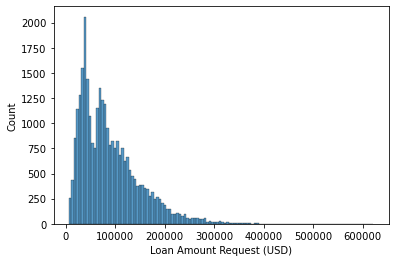

In [14]:
sns.histplot(train['Loan Amount Request (USD)'])

In [15]:
min(train['Loan Sanction Amount (USD)']), max(train['Loan Sanction Amount (USD)'])

(-999.0, 481907.32)

In [16]:
train=train.dropna(axis=0,subset=['Loan Sanction Amount (USD)'])
train=train[train['Loan Sanction Amount (USD)']!=-999]

In [17]:
train=train.sample(frac=1,random_state=42).reset_index().drop(columns='index')

In [18]:
train.shape, test.shape

((29322, 25), (20000, 24))

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  29322 non-null  object 
 1   Name                         29322 non-null  object 
 2   Gender                       29271 non-null  object 
 3   Age                          29322 non-null  int64  
 4   Income (USD)                 24911 non-null  float64
 5   Income Stability             27694 non-null  object 
 6   Profession                   29322 non-null  object 
 7   Type of Employment           22197 non-null  object 
 8   Location                     29322 non-null  object 
 9   Loan Amount Request (USD)    29322 non-null  float64
 10  Current Loan Expenses (USD)  29159 non-null  float64
 11  Expense Type 1               29322 non-null  object 
 12  Expense Type 2               29322 non-null  object 
 13  Dependents      

In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  20000 non-null  object 
 1   Name                         20000 non-null  object 
 2   Gender                       19969 non-null  object 
 3   Age                          20000 non-null  int64  
 4   Income (USD)                 19250 non-null  float64
 5   Income Stability             19187 non-null  object 
 6   Profession                   20000 non-null  object 
 7   Type of Employment           15311 non-null  object 
 8   Location                     20000 non-null  object 
 9   Loan Amount Request (USD)    20000 non-null  float64
 10  Current Loan Expenses (USD)  19917 non-null  float64
 11  Expense Type 1               20000 non-null  object 
 12  Expense Type 2               20000 non-null  object 
 13  Dependents      

#### formatting data properly

In [21]:
#### fixing data type inconsistencies

diff_dtype=[]
for i in test.columns:
    if test[i].dtypes!=train[i].dtypes:
        diff_dtype.append(i)

In [22]:
diff_dtype

['Co-Applicant', 'Property Price']

In [23]:
train['Property Price'].dtypes, test['Property Price'].dtypes

(dtype('float64'), dtype('O'))

In [24]:
train['Co-Applicant'].dtypes, test['Co-Applicant'].dtypes

(dtype('int64'), dtype('O'))

In [25]:
train['Co-Applicant'].value_counts()

 1      24894
 0       4268
-999      160
Name: Co-Applicant, dtype: int64

In [26]:
test['Co-Applicant'].value_counts()

1    17004
0     2919
?       77
Name: Co-Applicant, dtype: int64

In [27]:
test['Co-Applicant']=test['Co-Applicant'].replace({'?':'-999'})

In [28]:
train['Property Price'].value_counts(ascending=False).head()

-999.00       333
 28252.49       2
 44716.75       2
 145770.29      2
 57914.08       2
Name: Property Price, dtype: int64

In [29]:
test['Property Price'].value_counts(ascending=False).head()

?            168
101012.42      2
48198.94       2
37220.06       2
88372.15       2
Name: Property Price, dtype: int64

In [30]:
test['Property Price']=test['Property Price'].replace({'?':'-999'})

In [31]:
#### matching data types of columns

test['Co-Applicant']=test['Co-Applicant'].astype('int64')
test['Property Price']=test['Property Price'].astype('float64')

In [32]:
train.describe().apply(lambda x: x.apply(lambda y: format(y,'.2f')))

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Age,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD),cust_no
count,29322.00,24911.00,29322.00,29159.00,26920.00,27681.00,29322.00,29322.00,24649.00,29322.00,29322.00,29322.00,29322.00,29322.00
mean,40.12,2631.89,88779.82,400.92,2.25,739.90,0.19,502.01,2632.18,2.46,-4.60,131719.97,48210.12,25286.83
std,16.05,11376.30,59469.84,241.88,0.95,72.17,0.40,288.09,11435.38,1.12,73.66,93363.85,48212.94,14431.01
min,18.00,377.70,6048.24,-999.00,1.00,580.00,0.00,1.00,377.70,1.00,-999.00,-999.00,0.00,0.00
25%,25.00,1650.43,41182.65,247.66,2.00,681.87,0.00,251.00,1649.83,1.00,1.00,60652.94,0.00,12835.75
50%,40.00,2222.86,75094.79,375.00,2.00,739.91,0.00,504.00,2223.61,2.00,1.00,109996.74,36064.22,25491.00
75%,55.00,3090.33,119895.55,521.05,3.00,799.12,0.00,751.00,3090.87,3.00,1.00,178866.26,74779.28,37842.75
max,65.00,1777460.21,621497.82,3840.88,14.00,896.26,1.00,999.00,1777460.21,4.00,1.00,1077966.73,481907.32,49999.00


In [33]:
test.describe().apply(lambda x:x.apply(lambda y:format(y,'.2f')))

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Age,Property Type,Co-Applicant,Property Price,cust_no
count,20000.00,19250.00,20000.00,19917.00,18858.00,19257.00,20000.00,20000.00,19108.00,20000.00,20000.00,20000.00,20000.00
mean,39.94,2537.00,88859.08,408.46,2.25,738.82,0.19,501.02,2534.10,2.47,-3.00,132336.99,24890.46
std,16.10,1415.91,60007.33,215.85,0.95,72.41,0.39,287.54,1408.51,1.13,61.92,93748.75,14490.37
min,18.00,368.59,6185.48,41.37,1.00,580.04,0.00,1.00,368.59,1.00,-999.00,-999.00,2.00
25%,25.00,1659.72,40889.03,250.89,2.00,680.30,0.00,252.00,1658.40,1.00,1.00,60838.12,12212.50
50%,40.00,2224.59,74565.99,374.00,2.00,739.30,0.00,501.00,2220.60,2.00,1.00,110060.59,24808.50
75%,55.00,3082.92,120068.85,519.57,3.00,797.44,0.00,748.00,3082.25,3.00,1.00,179270.70,37419.25
max,65.00,30427.68,576335.68,3305.97,13.00,893.83,1.00,999.00,30427.68,4.00,1.00,816375.09,49997.00


In [34]:
### saving dataframe copies

train2=train.copy()
test2=test.copy()

In [35]:
target='Loan Sanction Amount (USD)'
y=train[target]
train=train.drop(columns=target)

#### combining for cleaning up and transformations`

In [36]:
comb=train.append(test)

#### EDA file creation

In [37]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


Shape of your Data Set: (49322, 25)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  7
    Number of Integer-Categorical Columns =  5
    Number of String-Categorical Columns =  5
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  4
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  3
    Number of Columns to Delete =  0
    25 Predictors classified...
        This does not include the Target column(s)
        3 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 28


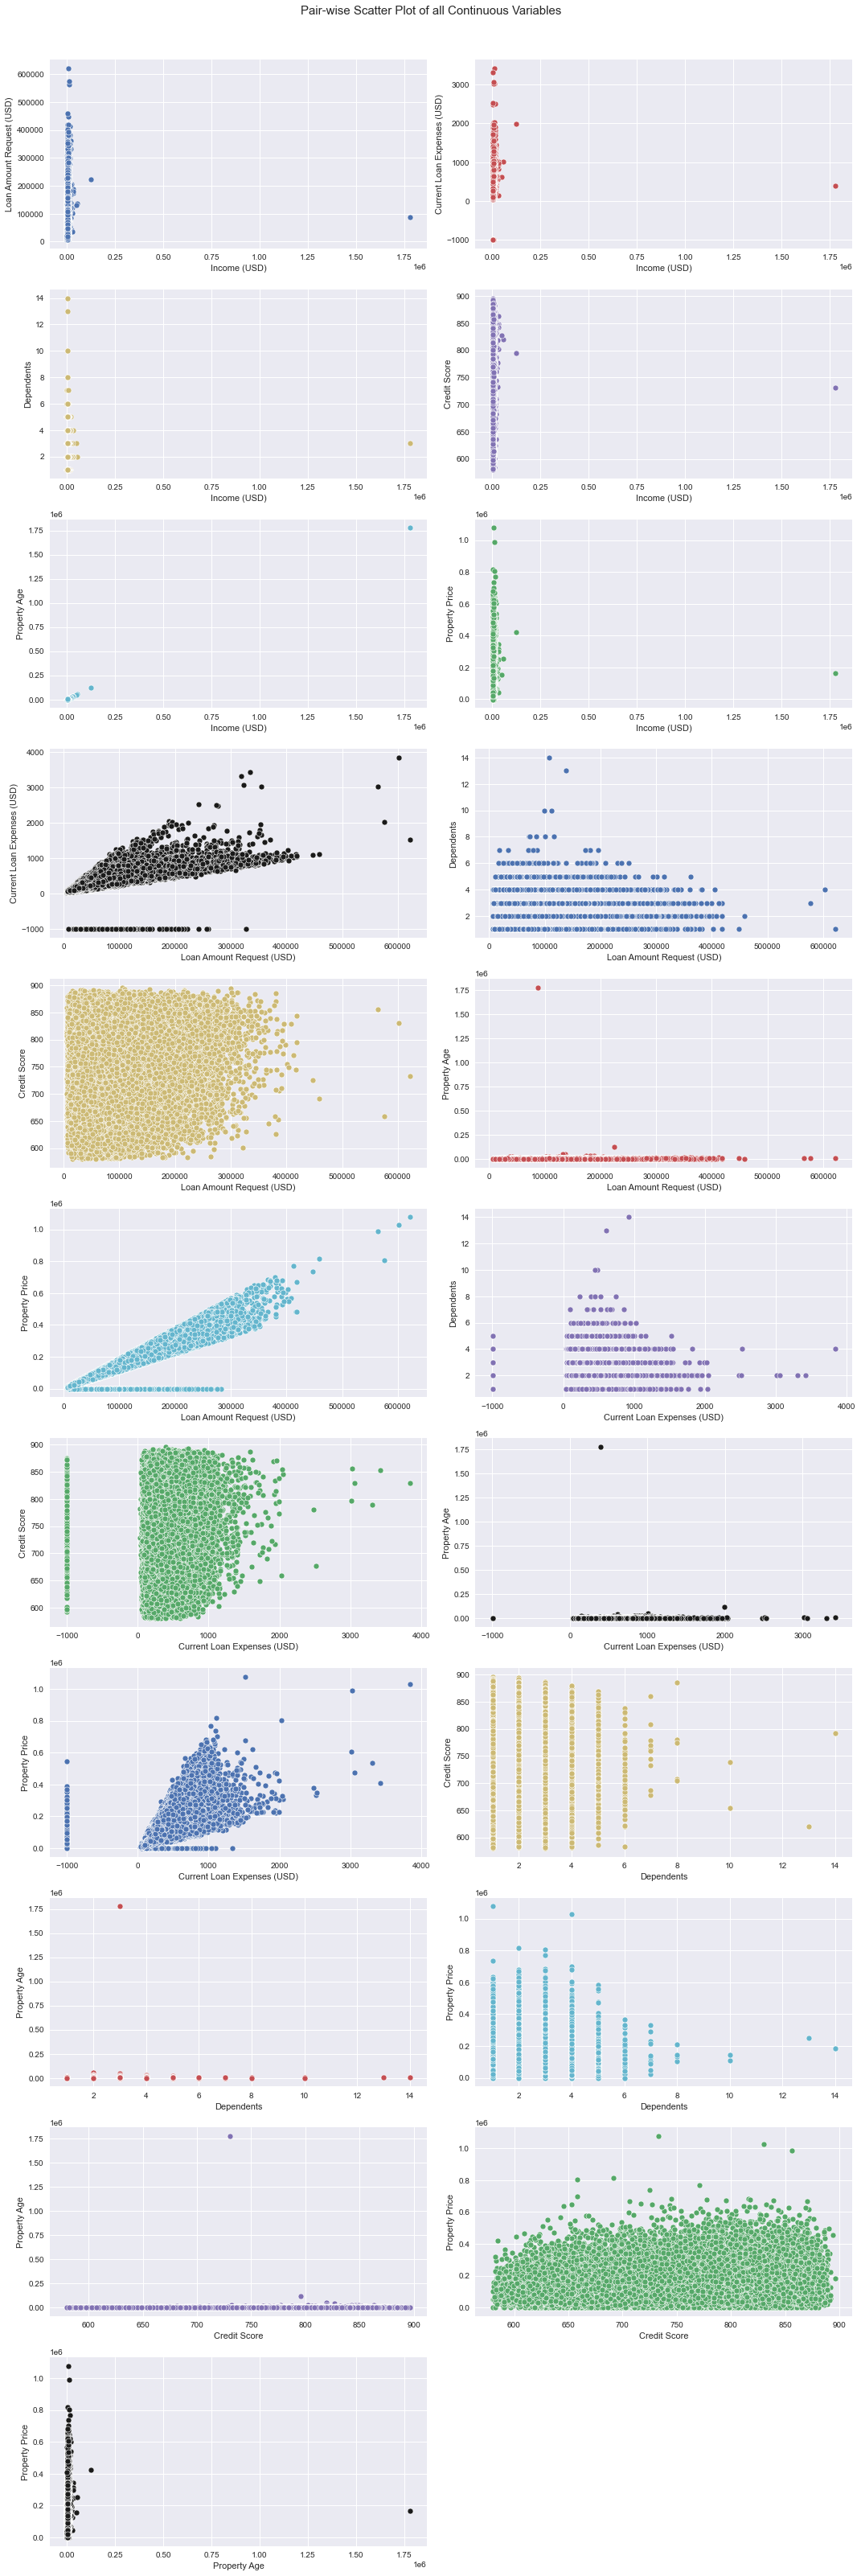

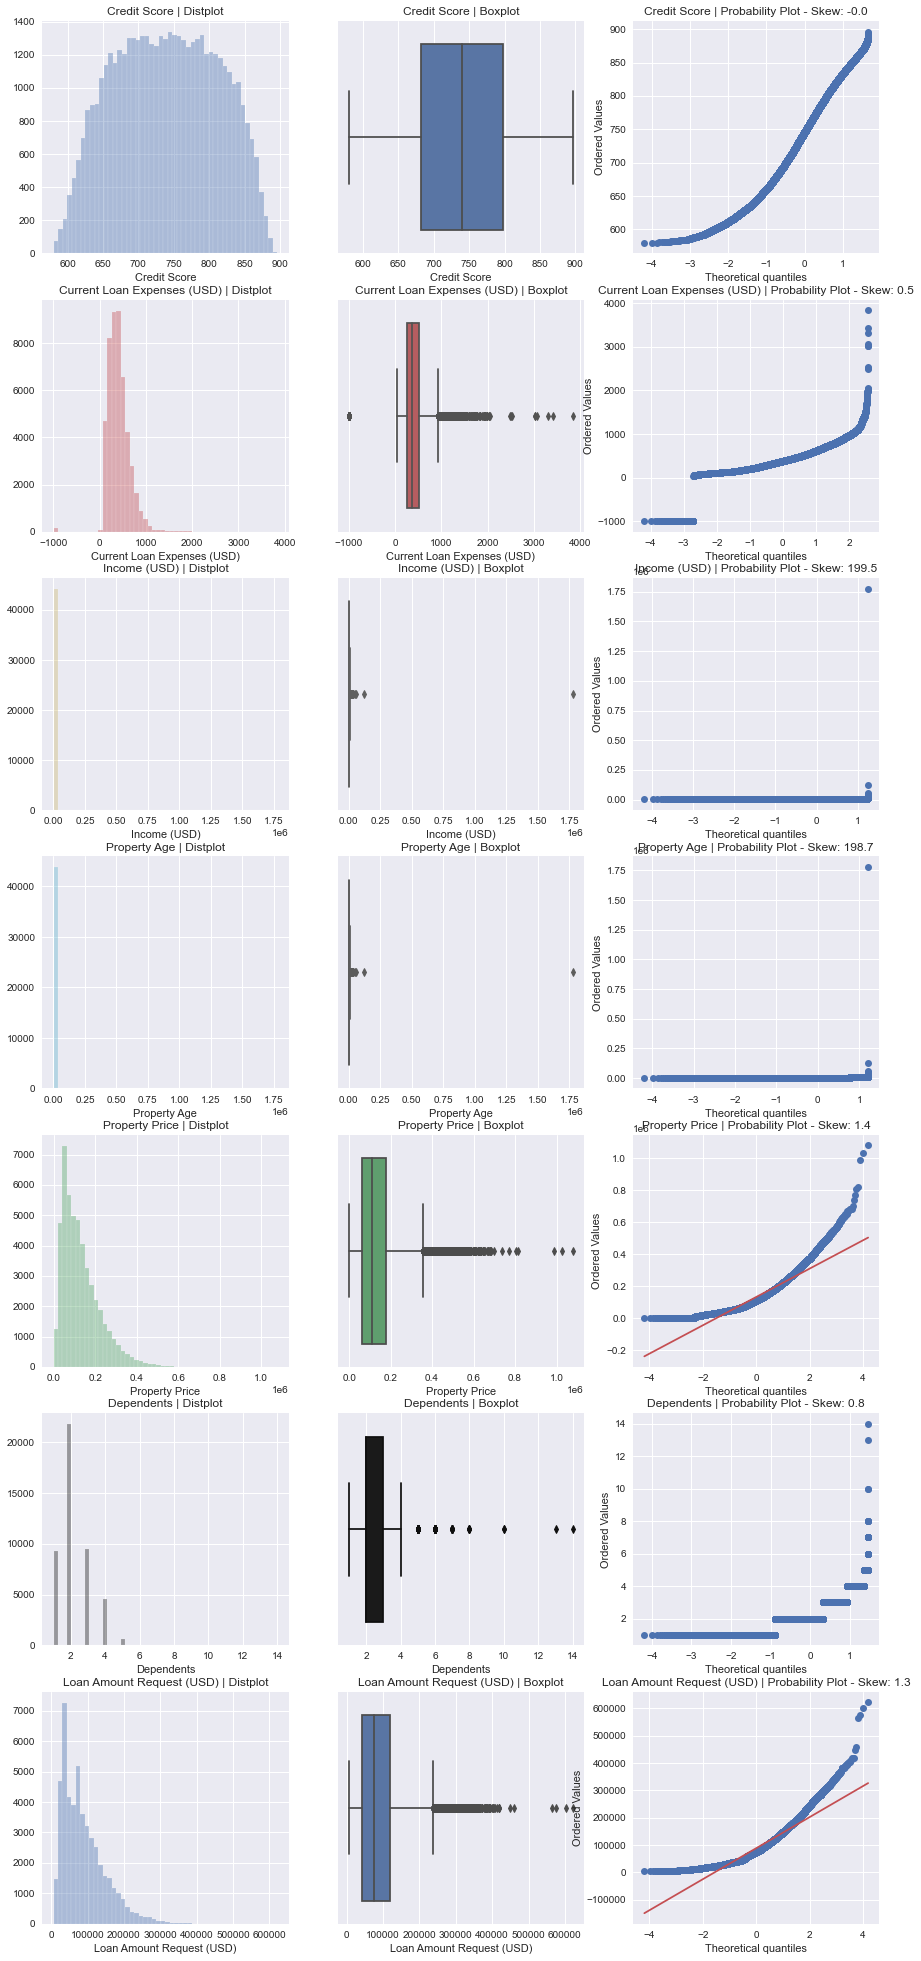

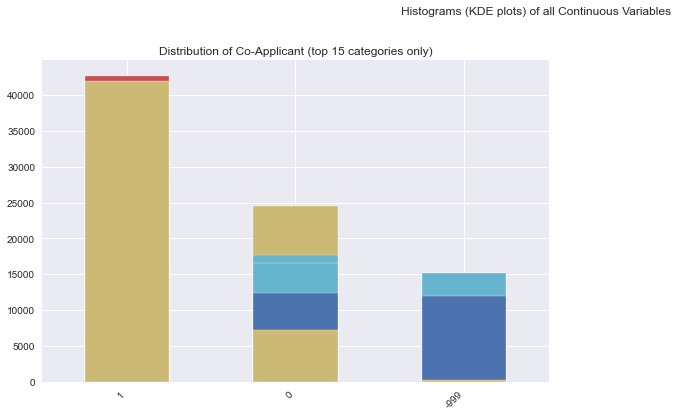

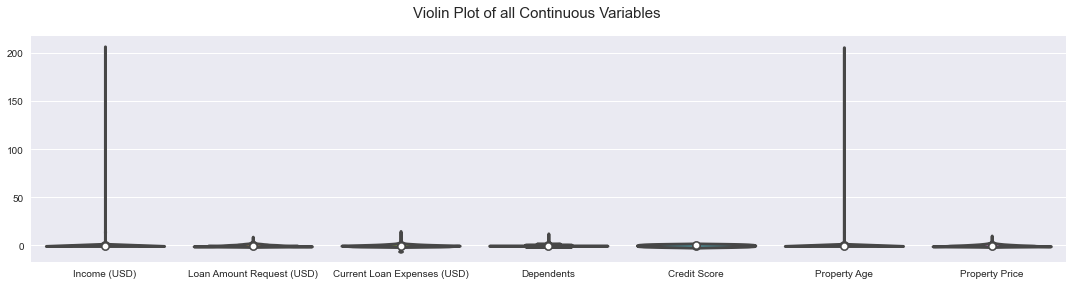

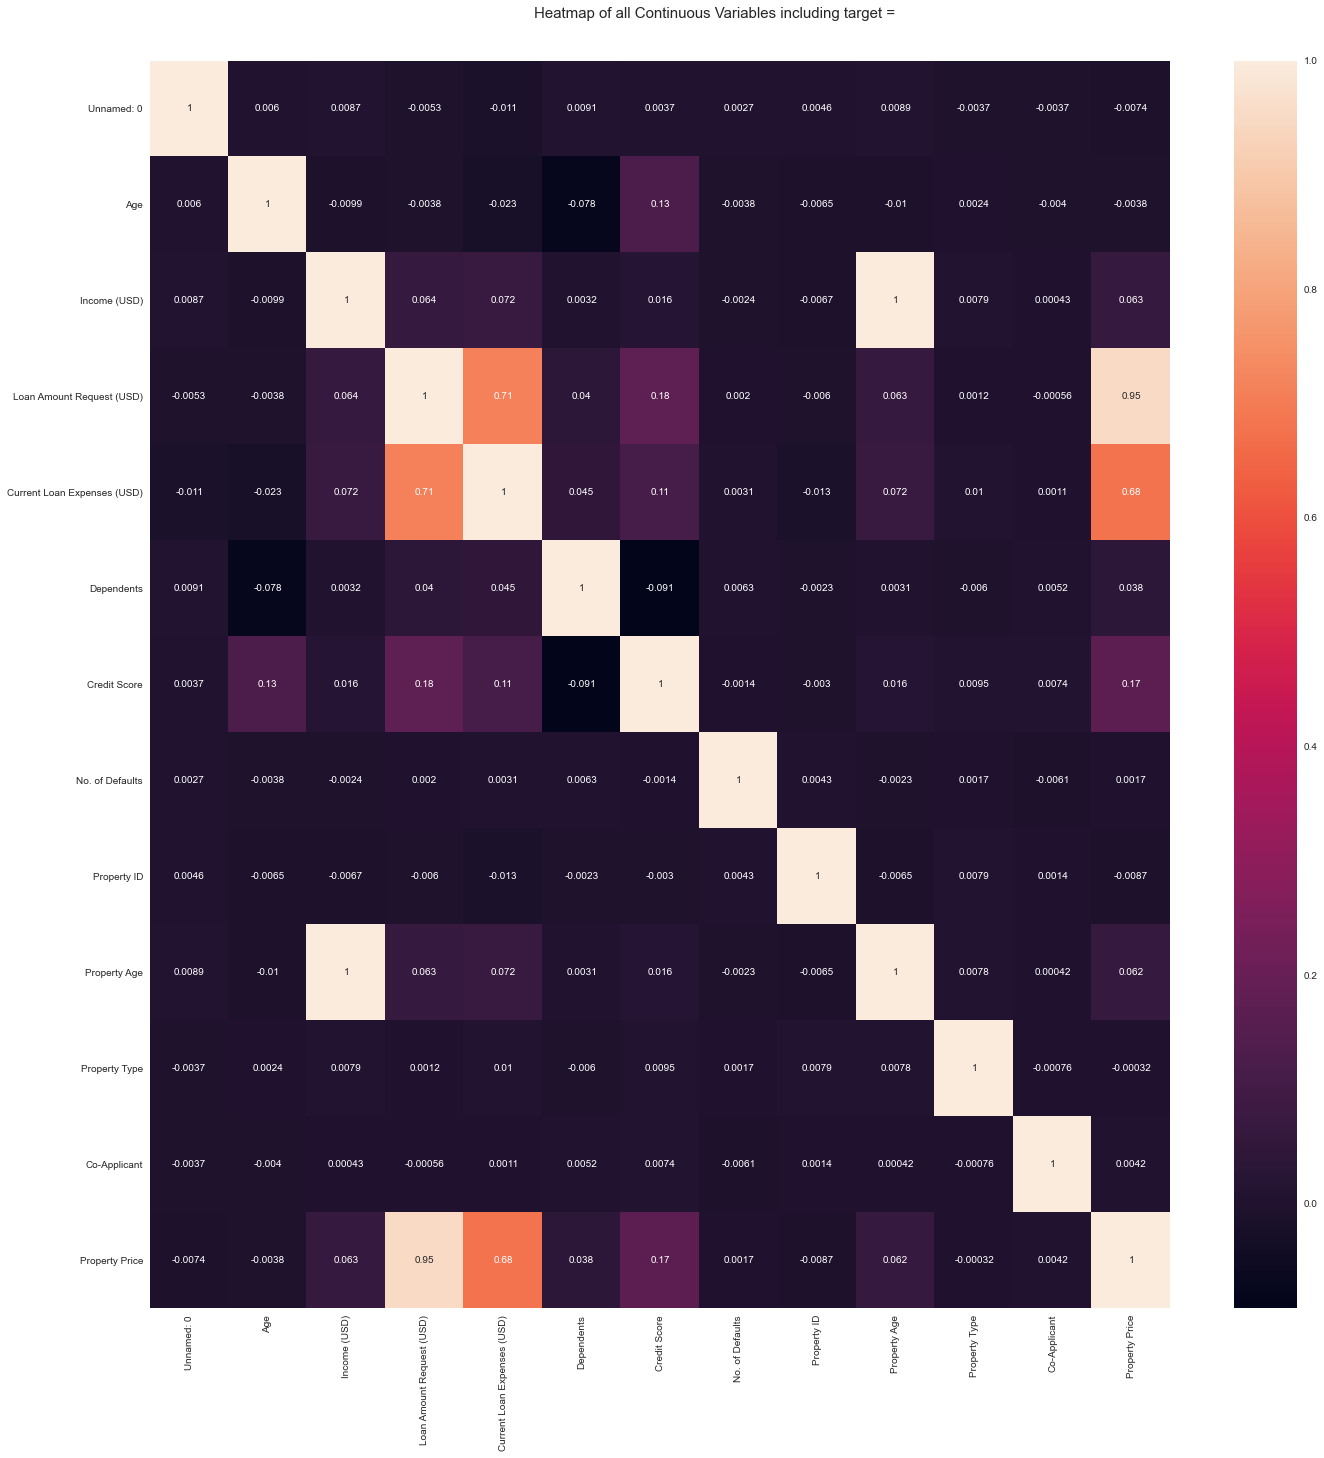

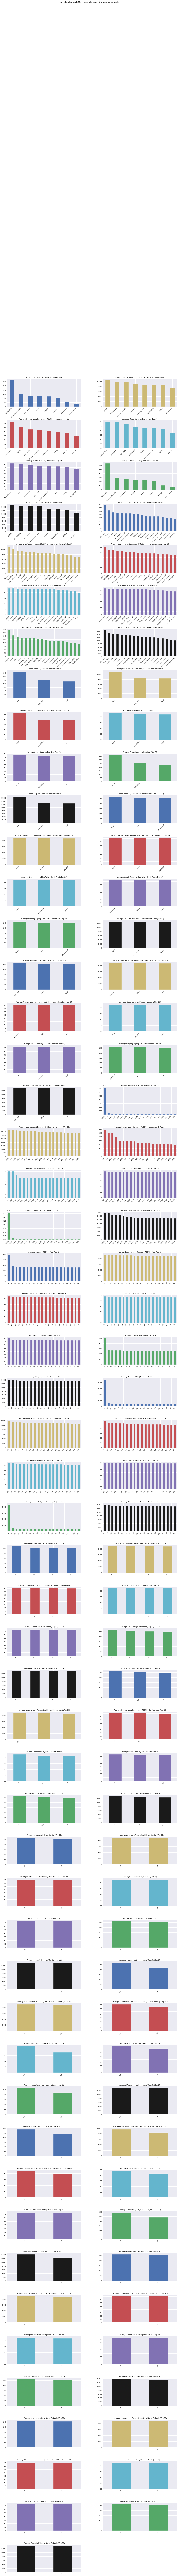

Time to run AutoViz (in seconds) = 17.057

 ###################### VISUALIZATION Completed ########################


In [38]:
df = AV.AutoViz('for_EDA.csv')

In [39]:
comb.shape

(49322, 24)

In [40]:
#### dropping useless columns
comb=comb.drop(columns=[id,'Name'])

In [41]:
comb.tail().T

,19995,19996,19997,19998,19999
Gender,F,M,M,F,M
Age,19,22,19,21,21
Income (USD),1349.6,2019.78,2252.03,1845.35,5233.16
Income Stability,Low,Low,Low,Low,Low
Profession,Commercial associate,Working,Working,Working,Working
Type of Employment,NaN,Core staff,Core staff,NaN,Laborers
Location,Semi-Urban,Urban,Semi-Urban,Semi-Urban,Semi-Urban
Loan Amount Request (USD),156767,47924.8,18629.9,95430.7,107966
Current Loan Expenses (USD),500.59,243.02,101.88,271.31,983.45
Expense Type 1,Y,Y,Y,N,Y


In [42]:
comb.isna().sum().sort_values(ascending=False)

Type of Employment             11814
Property Age                    5565
Income (USD)                    5161
Dependents                      3544
Has Active Credit Card          2597
Income Stability                2441
Credit Score                    2384
Property Location                501
Current Loan Expenses (USD)      246
Gender                            82
Loan Amount Request (USD)          0
Age                                0
Profession                         0
Location                           0
cust_no                            0
Expense Type 1                     0
Property Price                     0
No. of Defaults                    0
Property ID                        0
Property Type                      0
Co-Applicant                       0
Expense Type 2                     0
dtype: int64

In [43]:
comb.columns

Index(['Gender', 'Age', 'Income (USD)', 'Income Stability', 'Profession',
       'Type of Employment', 'Location', 'Loan Amount Request (USD)',
       'Current Loan Expenses (USD)', 'Expense Type 1', 'Expense Type 2',
       'Dependents', 'Credit Score', 'No. of Defaults',
       'Has Active Credit Card', 'Property ID', 'Property Age',
       'Property Type', 'Property Location', 'Co-Applicant', 'Property Price',
       'cust_no'],
      dtype='object')

In [44]:
#### checking value counts for categorical
cat=[]
non_cat=[]

for i in comb.columns:
    if comb[i].nunique()<20:
        cat.append(i)
    else:
        non_cat.append(i)

In [45]:
for i in cat:
    print(comb[i].value_counts(),'\n\n')

F    24691
M    24549
Name: Gender, dtype: int64 


Low     42670
High     4211
Name: Income Stability, dtype: int64 


Working                 27946
Commercial associate    13028
Pensioner                4461
State servant            3874
Student                     5
Unemployed                  4
Businessman                 2
Maternity leave             2
Name: Profession, dtype: int64 


Laborers                 9190
Sales staff              6104
Core staff               5385
Managers                 4152
Drivers                  2628
Accountants              2229
High skill tech staff    2162
Medicine staff           1436
Cooking staff             953
Security staff            941
Cleaning staff            564
Private service staff     532
Low-skill Laborers        291
Secretaries               276
Waiters/barmen staff      256
Realty agents             153
HR staff                  130
IT staff                  126
Name: Type of Employment, dtype: int64 


Semi-Urban    35541
Rura

In [46]:
non_cat

['Age',
 'Income (USD)',
 'Loan Amount Request (USD)',
 'Current Loan Expenses (USD)',
 'Credit Score',
 'Property ID',
 'Property Age',
 'Property Price',
 'cust_no']

In [47]:
#### saving comb copy
comb2=comb.copy()

# SKIP

In [50]:
# comb['Property Price'].value_counts(ascending=False).head()

-999.00       501
 31773.41       2
 279299.82      2
 84881.90       2
 101012.42      2
Name: Property Price, dtype: int64

In [51]:
# num=[]
# non_num=[]

# for i in comb.columns:
#     if comb[i].dtypes!='object':
#         num.append(i)
#     else:
#         non_num.append(i)

In [52]:
# num

['Age',
 'Income (USD)',
 'Loan Amount Request (USD)',
 'Current Loan Expenses (USD)',
 'Dependents',
 'Credit Score',
 'No. of Defaults',
 'Property ID',
 'Property Age',
 'Property Type',
 'Co-Applicant',
 'Property Price']

In [53]:
# non_num

['Gender',
 'Income Stability',
 'Profession',
 'Type of Employment',
 'Location',
 'Expense Type 1',
 'Expense Type 2',
 'Has Active Credit Card',
 'Property Location']

In [54]:
#### Cleaning missing values most basic way

In [55]:
# comb[non_num]=comb[non_num].fillna('Other')

In [56]:
# comb[num]=comb[num].fillna(-999)

In [57]:
# comb.isna().sum()

Gender                         0
Age                            0
Income (USD)                   0
Income Stability               0
Profession                     0
Type of Employment             0
Location                       0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Expense Type 1                 0
Expense Type 2                 0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Has Active Credit Card         0
Property ID                    0
Property Age                   0
Property Type                  0
Property Location              0
Co-Applicant                   0
Property Price                 0
dtype: int64

In [58]:
# ct=ColumnTransformer(transformers=[('ohe',ohe,non_num)],
#                      remainder='passthrough',
#                      n_jobs=-1
#                     )

In [59]:
# comb_matrix1=ct.fit_transform(comb)

In [60]:
# comb_matrix1.shape

(49322, 60)

In [61]:
# train_mat=comb_matrix1[:len(train)]
# test_mat=comb_matrix1[len(train):]

In [62]:
# cross_val_score(lgb,train_mat,y,cv=5,n_jobs=-1)

array([0.79755479, 0.7792989 , 0.82167483, 0.79286608, 0.80010883])

In [64]:
# make_csv(lgb,'lgb_base_model.csv')

#### missing value treatment

In [48]:
comb=comb2.copy()

In [49]:
comb.isna().sum().sort_values(ascending=False)

Type of Employment             11814
Property Age                    5565
Income (USD)                    5161
Dependents                      3544
Has Active Credit Card          2597
Income Stability                2441
Credit Score                    2384
Property Location                501
Current Loan Expenses (USD)      246
Gender                            82
Loan Amount Request (USD)          0
Age                                0
Profession                         0
Location                           0
cust_no                            0
Expense Type 1                     0
Property Price                     0
No. of Defaults                    0
Property ID                        0
Property Type                      0
Co-Applicant                       0
Expense Type 2                     0
dtype: int64

In [50]:
comb.describe()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Age,Property Type,Co-Applicant,Property Price,cust_no
count,49322.000000,4.416100e+04,49322.000000,49076.000000,45778.000000,46938.000000,49322.000000,49322.000000,4.375700e+04,49322.000000,49322.000000,4.932200e+04,49322.000000
mean,40.047159,2.590526e+03,88811.956876,403.981687,2.252894,739.456862,0.192166,501.612607,2.589351e+03,2.464782,-3.950874,1.319702e+05,25126.102855
std,16.072366,8.595351e+03,59687.779823,231.695514,0.952153,72.267218,0.394007,287.864661,8.633129e+03,1.121493,69.143976,9.351966e+04,14456.276125
min,18.000000,3.685900e+02,6048.240000,-999.000000,1.000000,580.000000,0.000000,1.000000,3.685900e+02,1.000000,-999.000000,-9.990000e+02,0.000000
25%,25.000000,1.654780e+03,41088.205000,248.987500,2.000000,681.170000,0.000000,252.000000,1.654260e+03,1.000000,1.000000,6.070607e+04,12598.250000
50%,40.000000,2.223600e+03,74882.655000,374.700000,2.000000,739.735000,0.000000,503.000000,2.222570e+03,2.000000,1.000000,1.100301e+05,25212.500000
75%,55.000000,3.087660e+03,119965.015000,520.532500,3.000000,798.370000,0.000000,750.000000,3.087260e+03,3.000000,1.000000,1.790084e+05,37668.750000
max,65.000000,1.777460e+06,621497.820000,3840.880000,14.000000,896.260000,1.000000,999.000000,1.777460e+06,4.000000,1.000000,1.077967e+06,49999.000000


In [51]:
comb['Current Loan Expenses (USD)']=np.where(comb['Current Loan Expenses (USD)']<0,0,comb['Current Loan Expenses (USD)'])

In [52]:
comb['Co-Applicant']=np.where(comb['Co-Applicant']<0,1,comb['Co-Applicant'])

In [53]:
comb['Property Price']=np.where(comb['Property Price']<0,np.NaN,comb['Property Price'])

In [54]:
#### using knn imputer for property matrices

In [55]:
imputer= KNNImputer(n_neighbors=5)

In [56]:
df=comb[['Property Price','Property Location','Property Age','Property ID','Property Type']]

In [57]:
df['Property Location'].value_counts()

Semi-Urban    16982
Rural         16588
Urban         15251
Name: Property Location, dtype: int64

In [58]:
df['Property Price'].value_counts(ascending=False, dropna=False)

NaN          501
54885.11       2
58830.74       2
85907.50       2
78707.16       2
            ... 
150890.58      1
95859.27       1
318613.95      1
177700.96      1
137129.74      1
Name: Property Price, Length: 48770, dtype: int64

In [59]:
df['Property Location']=df['Property Location'].replace({'Semi-Urban':2,'Rural':1,'Urban':3})

In [60]:
df['Property Location']=df['Property Location'].fillna(-1)

In [61]:
df['Property Location']=df['Property Location'].astype('int')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49322 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Property Price     48821 non-null  float64
 1   Property Location  49322 non-null  int64  
 2   Property Age       43757 non-null  float64
 3   Property ID        49322 non-null  int64  
 4   Property Type      49322 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 2.3 MB


In [63]:
df.isna().sum()

Property Price        501
Property Location       0
Property Age         5565
Property ID             0
Property Type           0
dtype: int64

In [64]:
df2=pd.DataFrame(sc.fit_transform(df),columns=df.columns)

In [65]:
df2.isna().sum()

Property Price        501
Property Location       0
Property Age         5565
Property ID             0
Property Type           0
dtype: int64

In [66]:
df3=pd.DataFrame(imputer.fit_transform(df2),columns=df.columns)

In [67]:
df4=pd.DataFrame(sc.inverse_transform(df3),columns=df.columns)

In [68]:
df4

,Property Price,Property Location,Property Age,Property ID,Property Type
0,217353.87,1.0,2749.00,935.0,3.0
1,96622.47,2.0,1604.77,53.0,1.0
2,111665.85,3.0,1474.93,572.0,1.0
3,186222.13,3.0,2634.50,98.0,3.0
4,262710.38,1.0,4317.93,794.0,1.0
...,...,...,...,...,...
49317,212778.00,2.0,1349.60,681.0,4.0
49318,90816.95,3.0,2019.78,213.0,4.0
49319,21566.27,1.0,2252.03,270.0,2.0
49320,120281.17,2.0,1845.35,489.0,1.0


In [69]:
df.shape

(49322, 5)

In [70]:
comb[['Property Price','Property Location','Property Age','Property ID','Property Type']]=df4

In [71]:
comb.isna().sum().sort_values(ascending=False)

Type of Employment             11814
Income (USD)                    5161
Dependents                      3544
Has Active Credit Card          2597
Income Stability                2441
Credit Score                    2384
Current Loan Expenses (USD)      246
Gender                            82
Age                                0
Profession                         0
Location                           0
Loan Amount Request (USD)          0
cust_no                            0
Expense Type 1                     0
Property Price                     0
No. of Defaults                    0
Property ID                        0
Property Age                       0
Property Type                      0
Property Location                  0
Co-Applicant                       0
Expense Type 2                     0
dtype: int64

In [72]:
comb['Gender'].value_counts(dropna=False)

F      24691
M      24549
NaN       82
Name: Gender, dtype: int64

In [73]:
comb['Gender']=comb['Gender'].fillna('Others')

In [74]:
pd.crosstab(comb['Profession'],comb['Income Stability'])

Income Stability,High,Low
Profession,,
Businessman,0,1
Commercial associate,0,12403
Maternity leave,0,2
Pensioner,4208,0
State servant,0,3705
Student,0,4
Unemployed,3,0
Working,0,26555


In [75]:
comb.groupby('Profession').agg({'Income (USD)':'mean'})

,Income (USD)
Profession,
Businessman,6425.990000
Commercial associate,2982.796711
Maternity leave,734.490000
Pensioner,2165.151688
State servant,2578.164958
Student,2500.882000
Unemployed,1077.990000
Working,2477.347990


In [76]:
# comb=comb.drop(columns='Income Stability')

In [77]:
inc1=pd.DataFrame(comb.groupby(['Profession','Type of Employment']).agg({'Income (USD)':'mean'}).reset_index())

In [78]:
inc1[:5]

,Profession,Type of Employment,Income (USD)
0,Businessman,Core staff,2551.670000
1,Businessman,Managers,10300.310000
2,Commercial associate,Accountants,3164.767916
3,Commercial associate,Cleaning staff,2086.850612
4,Commercial associate,Cooking staff,2309.120000


In [79]:
inc2=pd.DataFrame(comb.groupby(['Profession']).agg({'Income (USD)':'mean'}).reset_index())

In [80]:
inc2[:5]

,Profession,Income (USD)
0,Businessman,6425.990000
1,Commercial associate,2982.796711
2,Maternity leave,734.490000
3,Pensioner,2165.151688
4,State servant,2578.164958


In [81]:
comb['Type of Employment'].isna().sum()

11814

In [82]:
comb['Income (USD)'].isna().sum()

5161

In [83]:
inc1.dtypes

Profession             object
Type of Employment     object
Income (USD)          float64
dtype: object

In [84]:
comb[inc1.columns].dtypes

Profession             object
Type of Employment     object
Income (USD)          float64
dtype: object

In [85]:
comb.isna().sum().sort_values(ascending=False)

Type of Employment             11814
Income (USD)                    5161
Dependents                      3544
Has Active Credit Card          2597
Income Stability                2441
Credit Score                    2384
Current Loan Expenses (USD)      246
cust_no                            0
Age                                0
Profession                         0
Location                           0
Loan Amount Request (USD)          0
Expense Type 2                     0
Expense Type 1                     0
Property Price                     0
No. of Defaults                    0
Property ID                        0
Property Age                       0
Property Type                      0
Property Location                  0
Co-Applicant                       0
Gender                             0
dtype: int64

In [86]:
### imputing from inc1 (profession x type of emp values where available) else imputing from inc2 (profession average)

In [87]:
comb_new=comb.merge(inc1,how='left',on=['Profession','Type of Employment'])

In [88]:
comb_new=comb_new.rename(columns={'Income (USD)_x':'Income (USD)','Income (USD)_y':'inc1 income'})

In [89]:
comb_new=comb_new.merge(inc2,how='left',on=['Profession'])

In [90]:
comb_new=comb_new.rename(columns={'Income (USD)_x':'Income (USD)','Income (USD)_y':'inc2 income'})

In [91]:
comb_new['Income (USD)']=comb_new['Income (USD)'].fillna(comb_new['inc1 income'])

In [92]:
comb_new['Income (USD)']=comb_new['Income (USD)'].fillna(comb_new['inc2 income'])

In [93]:
comb_new=comb_new.drop(columns=['inc1 income','inc2 income'])

In [94]:
comb=comb_new

In [95]:
comb.isna().sum().sort_values(ascending=False)

Type of Employment             11814
Dependents                      3544
Has Active Credit Card          2597
Income Stability                2441
Credit Score                    2384
Current Loan Expenses (USD)      246
cust_no                            0
Age                                0
Income (USD)                       0
Profession                         0
Location                           0
Loan Amount Request (USD)          0
Expense Type 2                     0
Expense Type 1                     0
Property Price                     0
No. of Defaults                    0
Property ID                        0
Property Age                       0
Property Type                      0
Property Location                  0
Co-Applicant                       0
Gender                             0
dtype: int64

In [96]:
comb['Dependents']=comb['Dependents'].fillna(1)
comb['Has Active Credit Card']=comb['Has Active Credit Card'].fillna('Others')
comb['Credit Score']=comb['Credit Score'].fillna(comb['Credit Score'].mean())

In [97]:
comb=comb.drop(columns=['Income Stability','Type of Employment'])

In [98]:
comb['Current Loan Expenses (USD)']=comb['Current Loan Expenses (USD)'].fillna(0)

# new features

In [99]:
comb.columns

Index(['Gender', 'Age', 'Income (USD)', 'Profession', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Property ID',
       'Property Age', 'Property Type', 'Property Location', 'Co-Applicant',
       'Property Price', 'cust_no'],
      dtype='object')

In [100]:
comb.head().T

,0,1,2,3,4
Gender,M,F,M,F,M
Age,40,18,62,28,53
Income (USD),2749,1604.77,1474.93,2634.5,4317.93
Profession,Commercial associate,Commercial associate,Commercial associate,Commercial associate,Working
Location,Semi-Urban,Semi-Urban,Rural,Semi-Urban,Semi-Urban
Loan Amount Request (USD),132051,80055.7,69520.3,99586.3,151034
Current Loan Expenses (USD),660.55,329.73,559.24,563.3,461.76
Expense Type 1,Y,Y,N,Y,Y
Expense Type 2,Y,Y,Y,Y,N
Dependents,4,2,1,4,2


In [101]:
comb['Expense Type 1']=comb['Expense Type 1'].replace({'Y':1,'N':0})

In [102]:
comb['Expense Type 2']=comb['Expense Type 2'].replace({'Y':1,'N':0})

In [103]:
comb['total_expense']=comb['Expense Type 1']+comb['Expense Type 2']

In [104]:
comb['percent_loan_asked']=comb['Loan Amount Request (USD)']/comb['Property Price']

In [105]:
comb['curr_loan_to_inc']=comb['Current Loan Expenses (USD)']/comb['Income (USD)']

In [106]:
comb['loan_to_inc']=comb['Loan Amount Request (USD)']/comb['Income (USD)']

In [107]:
comb=comb.drop(columns='Property ID')

In [108]:
comb['Location'].dtypes

dtype('O')

In [109]:
comb['Location']=comb['Location'].replace({'Semi-Urban':2,'Rural':1,'Urban':3})

In [110]:
comb['upgrade']=comb['Property Location']-comb['Location']

In [121]:
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()

In [111]:
# comb_df=comb[non_num].apply(le.fit_transform)

In [112]:
# comb_df.head()

In [113]:
# comb2=comb

In [114]:
# comb2[non_num]=comb_df

In [148]:
# train_mat1=comb2[:len(train)]
# test_mat1=comb2[len(train):]


# cross_val_score(lgb,train_mat1,y,cv=5,n_jobs=-1,scoring='r2')

array([0.97822106, 0.97656207, 0.98565616, 0.97636016, 0.98243227])

In [149]:
# lgb.fit(train_mat1,y)

LGBMRegressor(random_state=42)

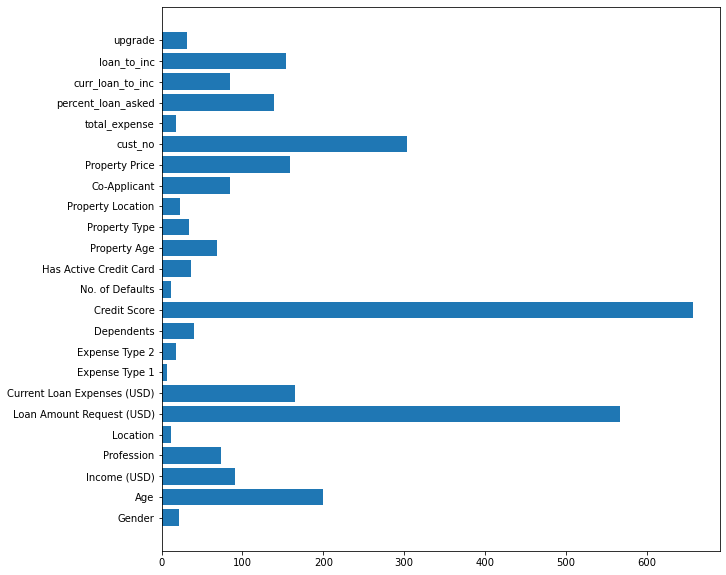

In [160]:
# plt.figure(figsize=(10,10))
# plt.barh(width=lgb.feature_importances_,y=comb2.columns);

In [115]:
num=[]
non_num=[]

for i in comb.columns:
    if comb[i].dtypes!='object':
        num.append(i)
    else:
        non_num.append(i)

In [116]:
ct=ColumnTransformer(transformers=[('ohe',ohe,non_num)],
                     remainder='passthrough',
                     n_jobs=-1
                    )

In [117]:
comb_mat=ct.fit_transform(comb)

In [119]:
comb_mat.shape

(49322, 36)

In [120]:
train_mat=comb_mat[:len(train)]
test_mat=comb_mat[len(train):]

In [121]:
train_mat.shape

(29322, 36)

In [122]:
y.shape

(29322,)

In [123]:
min(y), max(y)

(0.0, 481907.32)

In [124]:
cross_val_score(lgb,train_mat,y,cv=5,n_jobs=-1,scoring='r2')

array([0.97893667, 0.97763322, 0.98672112, 0.97715311, 0.98267496])

In [125]:
make_csv(lgb,'lgb_after_clean.csv')

#### trying kfold

In [138]:
from sklearn.model_selection import KFold

In [139]:
kf=KFold(n_splits=10,shuffle=True,random_state=42)

In [132]:
train_mat.shape

(29322, 36)

In [133]:
y.shape

(29322,)

In [146]:
from sklearn.metrics import r2_score

In [174]:
df=pd.DataFrame(columns=range(0,10))
def kfoldscore(model):
    val=0
    for fold,(train_idx,test_idx) in enumerate(kf.split(train_mat)):
        
        X_train=train_mat[train_idx,:]
        y_train=y.iloc[train_idx]
    
        X_test=train_mat[test_idx,:]
        y_test=y.iloc[test_idx]
        
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        
        df[fold]=model.predict(test_mat)
        df[fold]=np.where(df[fold]<0,0,df[fold])
        
        print(r2_score(y_test,y_pred))
        val+=r2_score(y_test,y_pred)
        
    print('\nMean r2 is',round(val/10,5))

In [181]:
kfoldscore(lgb)

0.9805880992730409
0.9789890833991071
0.9727242913796664
0.9805580608801893
0.9855715819322535
0.9842912376877725
0.9829196434281176
0.9799534862862016
0.9789414282409912
0.9802538971800981

Mean r2 is 0.98048


In [182]:
kfoldscore(xgb)

0.9819520720159486
0.983640479322538
0.9755805012977866
0.9851134258755606
0.9834309946893675
0.984652241546818
0.9871442331952938
0.9865745154744788
0.9791809873691778
0.9822484769805053

Mean r2 is 0.98295


In [154]:
pred_val=df.mean(axis=1)
df=pd.DataFrame({id:test_id,target:pred_val})
df.to_csv('lgbm_kfold.csv',index=False)

# USED FILE

In [183]:
pred_val=df.mean(axis=1)
df=pd.DataFrame({id:test_id,target:pred_val})
df.to_csv('xgb_kfold.csv',index=False)

### tuning lgbm (didn't work)

In [156]:
lgb.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 42,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [159]:
from sklearn.model_selection import GridSearchCV

In [164]:
# grid2={
#     'boosting_type':['dart','gbdt'],
#     'n_estimators':[100,300,500,900],
#     'num_leaves':[26,31,36]
# }
# lgbm_g2=GridSearchCV(estimator=lgb,
#                      param_grid=grid2,
#                      scoring='r2',
#                      n_jobs=-1,
#                      cv=5,
#                      verbose=1)

In [177]:
# grid2={
#     'num_leaves':[22,24,26,28,30]
# }
# lgbm_g2=GridSearchCV(estimator=lgb,
#                      param_grid=grid2,
#                      scoring='r2',
#                      n_jobs=-1,
#                      cv=5,
#                      verbose=1)

In [178]:
# %%time
# lgbm_g2.fit(train_mat,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    3.2s finished


CPU times: user 1.62 s, sys: 318 ms, total: 1.94 s
Wall time: 3.55 s


GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=42), n_jobs=-1,
             param_grid={'num_leaves': [22, 24, 26, 28, 30]}, scoring='r2',
             verbose=1)

In [167]:
# lgbm_g2.best_params_

{'boosting_type': 'gbdt', 'n_estimators': 100, 'num_leaves': 26}

In [179]:
# lgbm_g2.best_params_

{'num_leaves': 26}

In [172]:
# kfoldscore(LGBMRegressor(boosting_type='gbdt',n_estimators=100,num_leaves=26,random_state=42,n_jobs=-1))

0.9814071294517315
0.97945533542109
0.9733844381987052
0.9808278062021698
0.9853302874108951
0.984721150605396
0.9834824076483293
0.9799722144412303
0.9789208331017887
0.9809586230287096

Mean roc auc score is 0.98085


In [180]:
# pred_val=df.mean(axis=1)
# df=pd.DataFrame({id:test_id,target:pred_val})
# df.to_csv('lgbm_kfold2.csv',index=False)

In [185]:
xgb.get_params()

{'objective': 'reg:squarederror',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': -1,
 'num_parallel_tree': 1,
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}